In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, mean_squared_log_error,
median_absolute_error, r2_score)
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Regression model
from sklearn.svm import SVR  # Regression model
from sklearn.neighbors import KNeighborsRegressor  # Regression model
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.tree import DecisionTreeRegressor  # Regression model

In [2]:
df = pd.read_csv(r"C:\Users\abhay\Downloads\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.duplicated().sum()

240

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# Print the rows with duplicates
print(df.duplicated().sum())

0


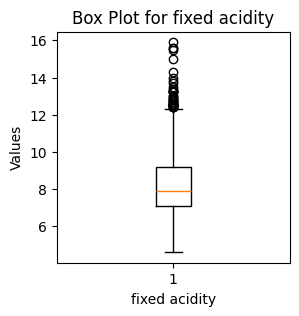

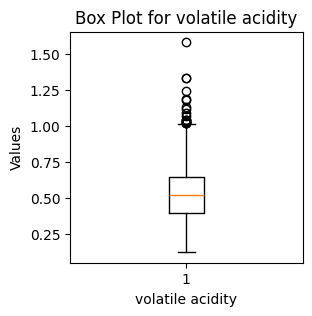

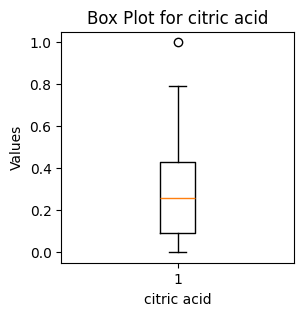

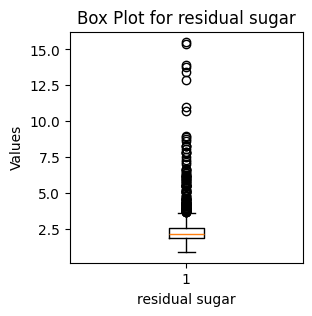

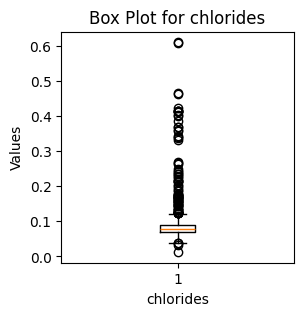

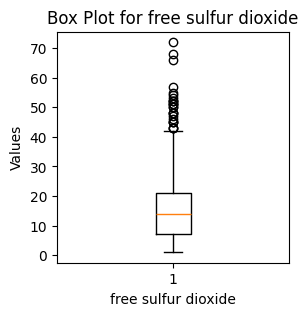

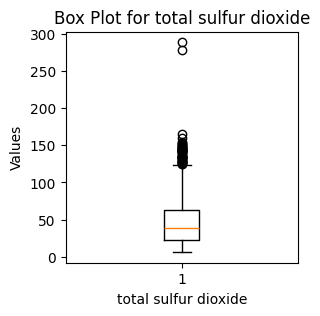

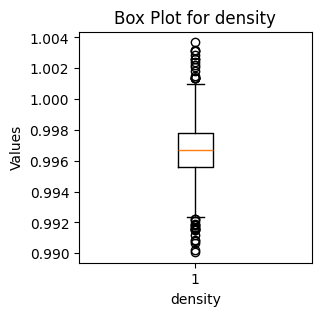

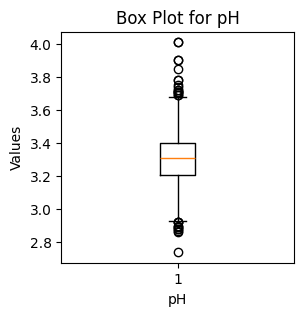

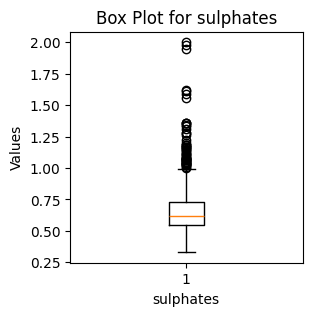

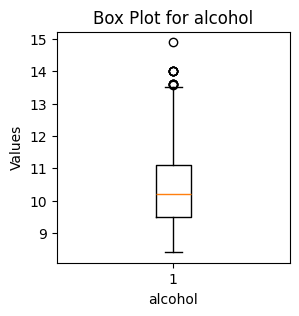

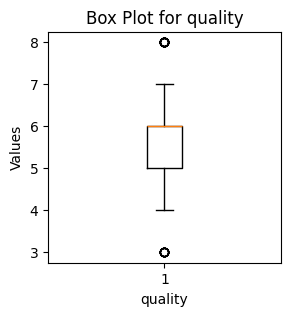

In [7]:
numeric_columns = df.select_dtypes(include='number')

for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(numeric_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()  

In [8]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [9]:
# Create a RobustScaler instance
scaler = RobustScaler()

XX = scaler.fit_transform(X)

In [10]:
# Compute Mutual Information
mutual_info = mutual_info_classif(XX, Y)

# Convert the array to a pandas series for easier visualization
mutual_info_series = pd.Series(mutual_info, index = X.columns)

# You can also sort and plot the values for better visualization
mutual_info_series.sort_values(ascending=False) #.plot.bar(figsize=(10, 5))

alcohol                 0.172740
sulphates               0.110693
volatile acidity        0.089518
total sulfur dioxide    0.062083
density                 0.044213
citric acid             0.038762
chlorides               0.016235
pH                      0.015851
free sulfur dioxide     0.015649
fixed acidity           0.014322
residual sugar          0.001508
dtype: float64

In [11]:
# # Apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(XX,Y)

# # Get the scores for each feature
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

# # Concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns, dfscores], axis=1)
# featureScores.columns = ['Feature','Score']  # naming the dataframe columns

# # Print the best features
# print(featureScores.nlargest(10,'Score')) # print 10 best features

In [12]:
# XX = X[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']]
# XX

In [13]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.3, random_state=42)

In [14]:
# Define the regression models and their hyperparameter grids
regressors = {
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
        }
    },
    'SVR': {
        'model': SVR(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'K-Nearest Neighbors Regressor': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [None, 10, 20],
        }
    }
}

# Model evaluation and metrics
results = {}
for name, config in regressors.items():
    clf = config['model']
    param_grid = config['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Cross-validation scores (negative mean squared error)
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'mean_cv_neg_mean_squared_error': np.mean(cv_scores),
        'mean_squared_error': mse,
        'r2_score': r2,
    }

# Print the results
for name, result in results.items():
    print(f'{name}:')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Mean Cross-Validation Negative Mean Squared Error: {result["mean_cv_neg_mean_squared_error"]}')
    print(f'Mean Squared Error on Test Set: {result["mean_squared_error"]}')
    print(f'R-squared (R2) Score on Test Set: {result["r2_score"]}')
    print()


Random Forest Regressor:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Mean Cross-Validation Negative Mean Squared Error: -0.4604232079091323
Mean Squared Error on Test Set: 0.3945194131647942
R-squared (R2) Score on Test Set: 0.41704070309294483

SVR:
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Mean Cross-Validation Negative Mean Squared Error: -0.4543046365266717
Mean Squared Error on Test Set: 0.39278504626018046
R-squared (R2) Score on Test Set: 0.41960348017704785

K-Nearest Neighbors Regressor:
Best Parameters: {'n_neighbors': 7}
Mean Cross-Validation Negative Mean Squared Error: -0.5071174945591352
Mean Squared Error on Test Set: 0.43577430972388953
R-squared (R2) Score on Test Set: 0.3560806471627753

Linear Regression:
Best Parameters: {}
Mean Cross-Validation Negative Mean Squared Error: -0.45762044943933067
Mean Squared Error on Test Set: 0.4185465718806318
R-squared (R2) Score on Test Set: 0.3815371129418358

Decision Tree Regressor:
Best Parameters: {'max_depth': 1

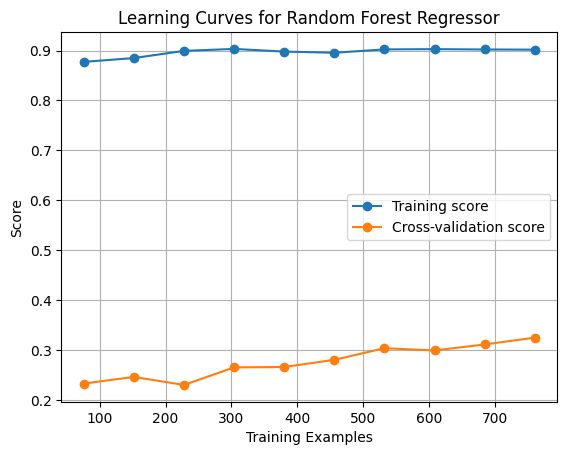

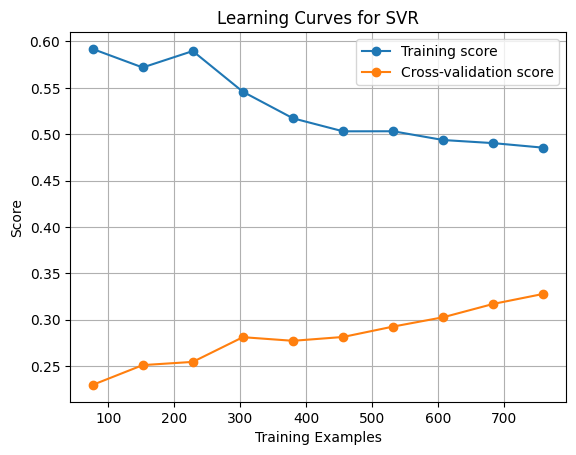

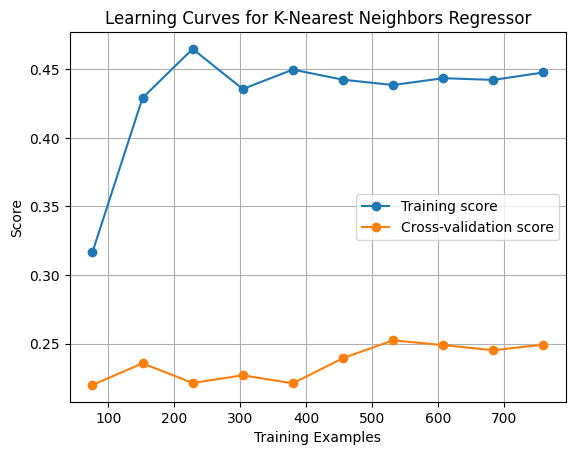

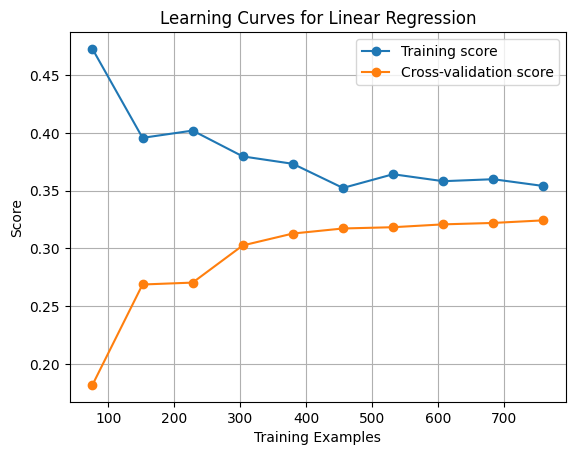

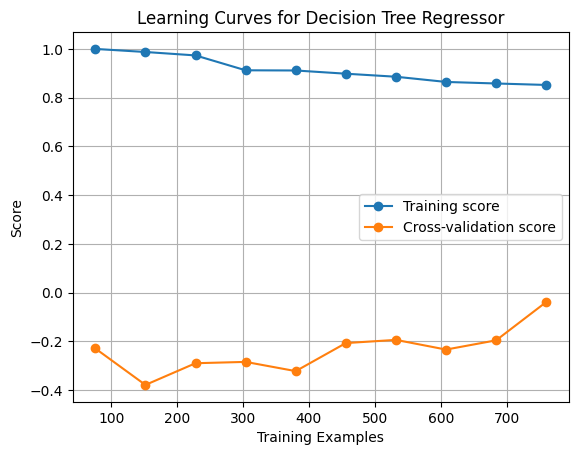

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Loop through classifiers
for name, result in results.items():
    best_model = result['best_model']
    
    # Calculate learning curves for the best model of each classifier
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure()
    plt.title(f"Learning Curves for {name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

    plt.legend(loc="best")
plt.show()